In [1]:
import datetime
import string

import pandas as pd
import sqlite3

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
def load_dataframe(column):
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
            select 
              {column} as group_name,
              urban_center_id,
              100*prediction_osm_completeness_2008 as "2008",
              100*prediction_osm_completeness_2009 as "2009",
              100*prediction_osm_completeness_2010 as "2010",
              100*prediction_osm_completeness_2011 as "2011",
              100*prediction_osm_completeness_2012 as "2012",
              100*prediction_osm_completeness_2013 as "2013",
              100*prediction_osm_completeness_2014 as "2014",
              100*prediction_osm_completeness_2015 as "2015",
              100*prediction_osm_completeness_2016 as "2016",
              100*prediction_osm_completeness_2017 as "2017",
              100*prediction_osm_completeness_2018 as "2018",
              100*prediction_osm_completeness_2019 as "2019",
              100*prediction_osm_completeness_2020 as "2020",
              100*prediction_osm_completeness_2021 as "2021",
              100*prediction_osm_completeness as "2022"
            from rf_adjusted_prediction_reference_and_osm_urban_centers a
            where {column} is not null
            order by group_name 
    """
    df = pd.read_sql_query(query, con=con)
    return df

## Aggregation by World Bank region and SHDI class

,group_name,urban_center_id,year,prediction_osm_completeness
0,East Asia & Pacific,2,2008-01-01,NaN
1,East Asia & Pacific,6330,2008-01-01,0.000000
2,East Asia & Pacific,6334,2008-01-01,0.000000
3,East Asia & Pacific,6391,2008-01-01,0.000000
4,East Asia & Pacific,6451,2008-01-01,0.000000
...,...,...,...,...
197830,Sub-Saharan Africa,2437,2022-01-01,53.770120
197831,Sub-Saharan Africa,2816,2022-01-01,97.794246
197832,Sub-Saharan Africa,5600,2022-01-01,76.374598
197833,Sub-Saharan Africa,5352,2022-01-01,31.407918


['Europe & Central Asia']
['North America']
['Sub-Saharan Africa']
['Latin America & Caribbean']
['East Asia & Pacific']
16.89887713214174 16.59036572534354 16.59036572534354
['Middle East & North Africa']
['South Asia']


,group_name,urban_center_id,year,prediction_osm_completeness
0,high,43,2008-01-01,0.000000
1,high,52,2008-01-01,0.000000
2,high,53,2008-01-01,0.000000
3,high,61,2008-01-01,0.000000
4,high,62,2008-01-01,0.000000
...,...,...,...,...
196480,very high,12349,2022-01-01,73.958568
196481,very high,12708,2022-01-01,7.443709
196482,very high,12827,2022-01-01,83.524930
196483,very high,12903,2022-01-01,26.009184


['low']
['medium']
['high']
14.577628468188573 12.150882783201686 12.150882783201686
['very high']


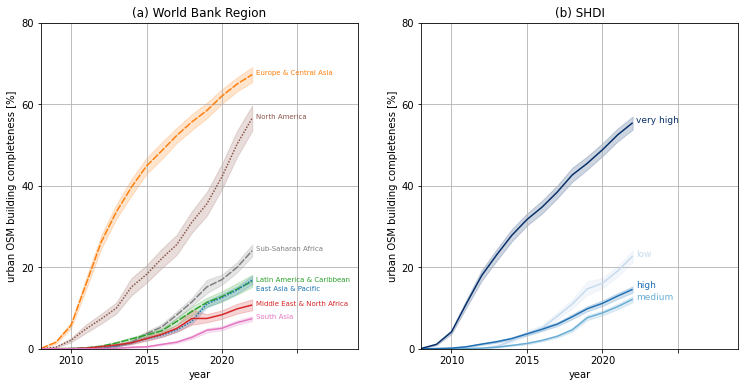

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12.5, 6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.2, hspace=0.2) # set the spacing between axes.

all_months = [
    datetime.date(2008, 1, 1),
    datetime.date(2009, 1, 1),
    datetime.date(2010, 1, 1),
    datetime.date(2011, 1, 1),
    datetime.date(2012, 1, 1),
    datetime.date(2013, 1, 1),
    datetime.date(2014, 1, 1),
    datetime.date(2015, 1, 1),
    datetime.date(2016, 1, 1),
    datetime.date(2017, 1, 1),
    datetime.date(2018, 1, 1),
    datetime.date(2019, 1, 1),
    datetime.date(2020, 1, 1),
    datetime.date(2021, 1, 1),
    datetime.date(2022, 1, 1)
]

for k, column in enumerate([
    "region_wb",
    "shdi_class", 
]):
    df = load_dataframe(column)
    
    if column == "region_wb":
        title = "World Bank Region"
        groups = wb_regions_groups = [
            ["Europe & Central Asia"],
            ["North America"],
            ["Sub-Saharan Africa"],
            ["Latin America & Caribbean"],
            ["East Asia & Pacific"],
            ["Middle East & North Africa"],
            ["South Asia"],

        ]

        labels = [
            "Europe & Central Asia",
            "North America",
            "Sub-Saharan Africa",
            "Latin America & Caribbean",
            "East Asia & Pacific",
            "Middle East & North Africa",
            "South Asia",
        ]
        
        cmap = matplotlib.cm.get_cmap('tab10')
        colors_dict = {
            "East Asia & Pacific": cmap(0),
            "Europe & Central Asia": cmap(0.125),
            "Latin America & Caribbean": cmap(0.25),
            "Middle East & North Africa": cmap(0.375),
            "North America": cmap(0.5),
            "South Asia": cmap(0.625),
            "Sub-Saharan Africa": cmap(0.75),
            "all": "black",
        }

        linestyles_dict = {
            "East Asia & Pacific": ('dotted', (0, (1, 1))),
            "Europe & Central Asia": ('densely dashed', (0, (5, 1))),
            "Latin America & Caribbean": ('densely dashed', (0, (5, 1))),
            "Middle East & North Africa": ('solid', (0, ())),
            "North America": ('dotted', (0, (1, 1))),
            "South Asia": ('solid',(0, ())),
            "Sub-Saharan Africa": ('densely dashed', (0, (5, 1))),
            "all":  ('solid', (0, ())),
        }
        
        fontsize = 7
        
    elif column == "shdi_class":
        title = "SHDI"
        groups = [
            ["low"], ["medium"], ["high"], ["very high"]
        ]

        labels = [
            "low",
            "medium",
            "high",
            "very high",
        ]
             
        cmap = matplotlib.cm.get_cmap('Blues')
        colors_dict = {
            "low": cmap(0.25), # low
            "medium": cmap(0.5),  # medium
            "high": cmap(0.75),  # high
            "very high": cmap(1.0),  # very high
        }
        
        linestyles_dict = {
            "low": ('solid',                 (0, ())),
            "medium": ('solid',                 (0, ())),
            "high": ('solid',                 (0, ())),
            "very high": ('solid',                 (0, ())),
        }
        
        fontsize = 9
        
    
    df = df.melt(
        id_vars=["group_name", "urban_center_id"], 
        var_name="year", 
        value_name="prediction_osm_completeness"
    )
    df["year"] = df["year"].apply(pd.to_datetime)
    display(df)
    
    ax = plt.subplot(gs1[k])
    max_y_values = []
    
    for i, group in enumerate(groups):
        print(group)
        
        region_df = df.loc[df["group_name"].isin(group)]
        region_df.reset_index(inplace=True)
        
        sns.lineplot(
            data=region_df,
            x="year",
            y="prediction_osm_completeness",
            color=colors_dict[group[0]],
            linestyle=linestyles_dict[group[0]][1],
            ci=95
        )
        
        max_y_value = region_df.loc[region_df["year"] == '2022']["prediction_osm_completeness"].mean()
        max_y_values.append(max_y_value)
        
        if i == 0:
            label_position = max_y_values[i]
        elif (abs(max_y_values[i-1] - max_y_values[i]) < 2.5) and column == "region_wb":
            print(max_y_values[i], max_y_values[i-1], label_position)
            label_position = float(max_y_values[i]) - 2.5
        elif (abs(max_y_values[i-1] - max_y_values[i]) < 2.5) and column == "shdi_class":
            print(max_y_values[i], max_y_values[i-1], label_position)
            label_position = float(max_y_values[i]) + 0.5
        else:
            label_position = max_y_values[i]
        
        ax.annotate(
            labels[i],
            (datetime.date(2022, 4, 1), label_position),
            fontsize=fontsize,
            color=colors_dict[group[0]]
        )

    ax.set_ylim([0, 70])
    ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2029, 1, 1)])
    ax.set_xticks([
        datetime.date(2010, 1, 1),
        datetime.date(2015, 1, 1),
        datetime.date(2020, 1, 1),
        datetime.date(2025, 1, 1),
    ])
    ax.set_xticklabels(["2010", "2015", "2020", ""])
    ax.set_yticks([
        0, 20, 40, 60, 80
    ])
    ax.set_ylabel("urban OSM building completeness [%]")
    ax.grid()
    ax.set_title(f"({string.ascii_lowercase[k]}) {title}")
        
plt.savefig(
    f"../figures/completeness_per_month_by_region_rf_adjusted_with_ci.png",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.25
)
plt.show()


## Additional Material: Aggregation by city size class

,group_name,urban_center_id,year,prediction_osm_completeness
0,large metropolitan areas,14,2008-01-01,0.019804
1,large metropolitan areas,21,2008-01-01,0.000000
2,large metropolitan areas,49,2008-01-01,0.000000
3,large metropolitan areas,74,2008-01-01,0.000000
4,large metropolitan areas,79,2008-01-01,0.000000
...,...,...,...,...
197830,small urban areas,13041,2022-01-01,54.096393
197831,small urban areas,13085,2022-01-01,81.864182
197832,small urban areas,13092,2022-01-01,85.874675
197833,small urban areas,13127,2022-01-01,97.763093


['small urban areas']
['medium-size urban areas']
['metropolitan areas']
['large metropolitan areas']


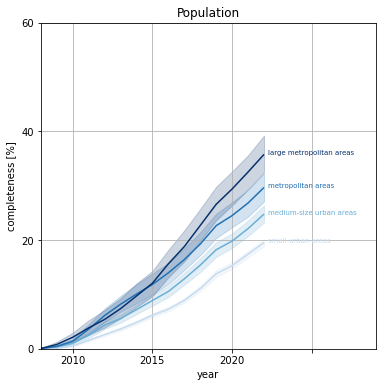

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
gs1 = gridspec.GridSpec(1, 1)
gs1.update(wspace=0.2, hspace=0.2) # set the spacing between axes.


all_months = [
    datetime.date(2008, 1, 1),
    datetime.date(2009, 1, 1),
    datetime.date(2010, 1, 1),
    datetime.date(2011, 1, 1),
    datetime.date(2012, 1, 1),
    datetime.date(2013, 1, 1),
    datetime.date(2014, 1, 1),
    datetime.date(2015, 1, 1),
    datetime.date(2016, 1, 1),
    datetime.date(2017, 1, 1),
    datetime.date(2018, 1, 1),
    datetime.date(2019, 1, 1),
    datetime.date(2020, 1, 1),
    datetime.date(2021, 1, 1),
    datetime.date(2022, 1, 1)
]

for k, column in enumerate([
    "ghspop_class"
]):
    df = load_dataframe(column)
    if column == "ghspop_class":
        title = "Population"
        groups = [
            ["small urban areas"],
            ["medium-size urban areas"],
            ["metropolitan areas"],
            ["large metropolitan areas"]
        ]

        labels = [
            "small urban areas",
            "medium-size urban areas",
            "metropolitan areas",
            "large metropolitan areas"
        ]

        cmap = matplotlib.cm.get_cmap('Blues')
        colors_dict = {
            "small urban areas": cmap(0.25), # low
            "medium-size urban areas": cmap(0.5),  # medium
            "metropolitan areas": cmap(0.75),  # high
            "large metropolitan areas": cmap(1.0),  # very high
        }
        
        linestyles_dict = {
            "small urban areas": ('solid',                 (0, ())),
            "medium-size urban areas": ('solid',                 (0, ())),
            "metropolitan areas": ('solid',                 (0, ())),
            "large metropolitan areas": ('solid',                 (0, ())),
        }
        
        fontsize = 7
        
        
    df = df.melt(
        id_vars=["group_name", "urban_center_id"], 
        var_name="year", 
        value_name="prediction_osm_completeness"
    )
    df["year"] = df["year"].apply(pd.to_datetime)
    display(df)
    
    ax = plt.subplot(gs1[k])
    max_y_values = []
    
    for i, group in enumerate(groups):
        print(group)
        
        region_df = df.loc[df["group_name"].isin(group)]
        region_df.reset_index(inplace=True)
        
        sns.lineplot(
            data=region_df,
            x="year",
            y="prediction_osm_completeness",
            color=colors_dict[group[0]],
            linestyle=linestyles_dict[group[0]][1],
            ci=95
        )
        
        max_y_value = region_df.loc[region_df["year"] == '2022']["prediction_osm_completeness"].mean()
        max_y_values.append(max_y_value)
        
        if i == 0:
            label_position = max_y_values[i]
        elif (abs(max_y_values[i-1] - max_y_values[i]) < 2.5) and column == "region_wb":
            print(max_y_values[i], max_y_values[i-1], label_position)
            label_position = float(max_y_values[i]) - 2.5
        elif (abs(max_y_values[i-1] - max_y_values[i]) < 2.5) and column == "shdi_class":
            print(max_y_values[i], max_y_values[i-1], label_position)
            label_position = float(max_y_values[i]) + 0.5
        else:
            label_position = max_y_values[i]
        
        ax.annotate(
            labels[i],
            (datetime.date(2022, 4, 1), label_position),
            fontsize=fontsize,
            color=colors_dict[group[0]]
        )


    ax.set_ylabel("completeness")

    ax.set_ylim([0, 60])
    ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2029, 1, 1)])
    ax.set_xticks([
        datetime.date(2010, 1, 1),
        datetime.date(2015, 1, 1),
        datetime.date(2020, 1, 1),
        datetime.date(2025, 1, 1),
    ])
    ax.set_xticklabels(["2010", "2015", "2020", ""])
    ax.set_yticks([
        0, 20, 40, 60
    ])
    ax.set_ylabel("completeness [%]")
    ax.grid()
    ax.set_title(f"{title}")
        
plt.savefig(
    f"../figures/completeness_per_month_by_region_rf_adjusted_population.png",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.25
)
plt.show()
